# KNN

- Linear Model = Linear regression, Logistic regression
- Non linear model = KNN, DT, SVM, RF

1. KNN non linear model
2. It can be used for classification as well as regression.
3. In case regression it calculates mean.
4. In case of classification it calculates mode.
5. KNN is also called as lazy learner as it it does not learn anything from data.
6. It uses distance calculations like euclidean or manhattan distance.
7. It is computationally expensive.
8. Don not use KNN if your dataset is huge.
9. Use it only for smaller datasets.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
x = df.iloc[:,[2,3]]
y = df['Purchased']

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [9]:
model = knn.fit(xtrain,ytrain)

ypred = model.predict(xtest)

In [10]:
ytest

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [11]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [14]:
accuracy_score(ypred,ytest)

0.83

In [15]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        67
           1       0.75      0.73      0.74        33

    accuracy                           0.83       100
   macro avg       0.81      0.80      0.81       100
weighted avg       0.83      0.83      0.83       100



In [16]:
print(confusion_matrix(ypred,ytest))

[[59  8]
 [ 9 24]]


In [19]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"{train}\n{test}")

0.8766666666666667
0.83


# Hyperparameter tuning

In [20]:
trainac = []
testac = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

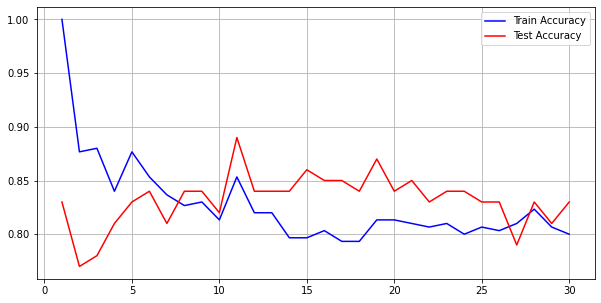

In [34]:
plt.figure(figsize=(10,5))
plt.plot(range(1,31),trainac, color = 'b',label = 'Train Accuracy' )
plt.plot(range(1,31), testac, color = 'r',label = 'Test Accuracy')
plt.grid()
plt.legend()

In [26]:
knn = KNeighborsClassifier(n_neighbors=6)

model = knn.fit(xtrain,ytrain)
pred= model.predict(xtest)

In [27]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"{train}\n{test}")

0.8533333333333334
0.84


In [28]:
accuracy_score(pred,ytest)

0.84

In [29]:
print(classification_report(pred,ytest))
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        76
           1       0.62      0.83      0.71        24

    accuracy                           0.84       100
   macro avg       0.78      0.84      0.80       100
weighted avg       0.87      0.84      0.85       100

[[64 12]
 [ 4 20]]


In [35]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [38]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Forecasting new observations

In [39]:
age = 19
es = 72000
newob = [[age, es]]
prediction = model.predict(newob)[0]

prediction

0

# Prediction function

In [42]:
def purchase():
    age = int(input('Enter your age: '))
    es = int(input('Enter salary: '))
    newob = [[age, es]]
    
    pred = model.predict(newob)[0]
    
    if pred == 1:
        print('He will purchase something!')
    else:
        print('He will not purchase anything.')
    return pred

In [43]:
purchase()

Enter your age: 25
Enter salary: 900000
He will purchase something!


1